In [1]:
using Graphs
using Plots, ColorSchemes
import Statistics: mean
include("../mpdbp.jl")
include("../exact/montecarlo.jl")

magnetizations (generic function with 2 methods)

In [28]:
q = 2   # binary variables
T = 3   # final time

J = [0 1 0 0 0;
     1 0 1 0 0;
     0 1 0 1 1;
     0 0 1 0 0;
     0 0 1 0 0] .|> float # adjacency matrix of a tree
N = 5
h = randn(N)

β = 1.0

p⁰ = map(1:N) do i    # random initial condition
    r = rand()
    r = 0.15
    [r, 1-r]
end

ϕ = [[ones(2) for t in 1:T] for i in 1:N]   # some observations
ϕ[1][1] = [1, 0]
ϕ[2][2] = [0, 1]
ϕ[2][3] = [0, 1]

2-element Vector{Int64}:
 0
 1

Compute everything exhaustively

In [29]:
ising = Ising(J, h, β)
gl = ExactGlauber(ising, p⁰, ϕ)
m = site_marginals(gl)
mm = site_time_marginals(gl; m)
m_exact = site_time_magnetizations(gl; m, mm)

Computing joint probability 100%|████████████████████████| Time: 0:00:05
Computing site marginals 100%|███████████████████████████| Time: 0:00:08


5-element Vector{Vector{Float64}}:
 [-0.7398103351716983, 1.0, -0.9851616871973654, -0.9925805124967935]
 [0.7063630047082737, -0.7405901167429296, -1.0, -1.0]
 [-0.8543036257911025, -0.9771111910727355, -0.86569854340237, -0.9252434284574781]
 [-0.911899423283399, -0.6212611256467775, -0.6742786033238599, -0.5902178563492753]
 [-0.911899423283399, -0.8063339758708548, -0.8641437411733153, -0.7843200627255087]

Compute using MPdBP

In [33]:
ε = 1e-4
bp = mpdbp(ising, T, ϕ, p⁰)
cb = CB_BP(bp)
iterate!(bp, maxiter=10; ε, cb)
println()
@show cb.Δs

b = beliefs(bp; ε)

@show m_bp = magnetizations(bp; ε)

Progress:  4 	 Time: 0:00:00
  it:  4
  Δ:   0.0


cb.Δs = [9.640633853745795, 0.41944373115695, 0.02871097348661389, 0.0]
m_bp = magnetizations(bp; ε) = [[-0.7398103351716985, 1.0, -0.9851616871973655, -0.9925805124967935], [0.7063630047082736, -0.7405901167429315, -0.9999999999999999, -0.9999999999999996], [-0.8543036257911019, -0.9771111910727353, -0.8656985434023651, -0.9252434284574775], [-0.9118994232833988, -0.621261125646777, -0.6742786033238597, -0.5902178563492673], [-0.9118994232833995, -0.8063339758708539, -0.8641437411733169, -0.7843200627254967]]


5-element Vector{Vector{Float64}}:
 [-0.7398103351716985, 1.0, -0.9851616871973655, -0.9925805124967935]
 [0.7063630047082736, -0.7405901167429315, -0.9999999999999999, -0.9999999999999996]
 [-0.8543036257911019, -0.9771111910727353, -0.8656985434023651, -0.9252434284574775]
 [-0.9118994232833988, -0.621261125646777, -0.6742786033238597, -0.5902178563492673]
 [-0.9118994232833995, -0.8063339758708539, -0.8641437411733169, -0.7843200627254967]

Compare magnetizations

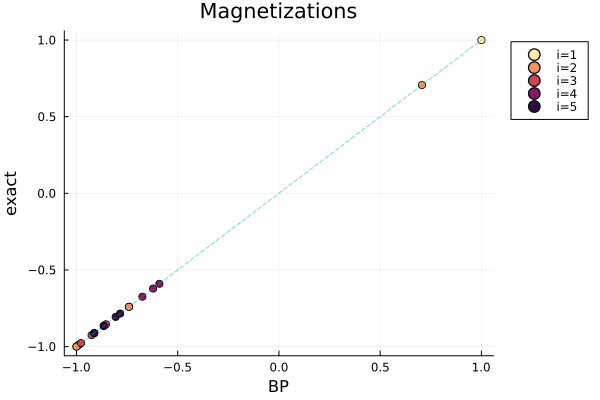

In [34]:
cg = cgrad(:matter, N, categorical=true)
pl = plot(xlabel="BP", ylabel="exact", title="Magnetizations")
for i in 1:N
    scatter!(pl, m_bp[i], m_exact[i], c=cg[i], label="i=$i")
end
plot!(pl, identity, ls=:dash, la=0.5, label="", legend=:outertopright)

Show global magnetization over time

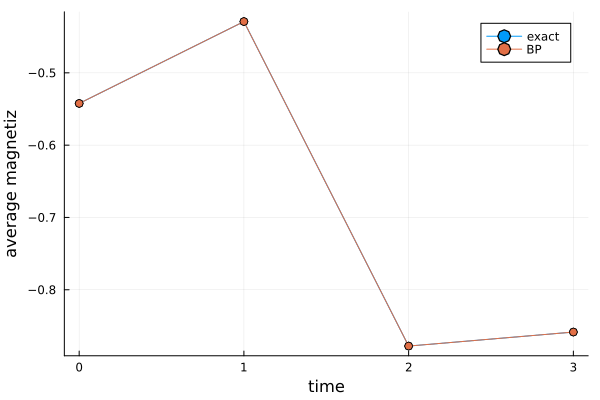

In [35]:
avg_m_exact = mean(m_exact)
avg_m_bp = mean(m_bp)
ylab = "average magnetiz"
pl2 = plot(0:T, avg_m_exact, m=:o, xlabel="time", ylabel=ylab, label="exact")
plot!(pl2, 0:T, avg_m_bp, m=:o, label="BP")